In [1]:
# 파이썬 버전 확인
!python -V

Python 3.9.13



## 2. 사이킷으로 시작하는 머신러닝

### 2.1 사이킷런 소개와 특징
아나콘다에 기본 설치 돼있어서 설치는 안해도 된당
버전확인정도만 하긔

In [2]:
import sklearn

In [3]:
sklearn.__version__

'1.0.2'

### 2.2 첫번쨰 머신러닝 만들어보기 - 붓꽃 품종 예측하기

붓꽃 데이터 피처 독립변수 x ....꽃받침 꽃잎의 길이, 너비
붓꽃 데이터 품종 레이블

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 분류에 쓰는 거
# from sklearn.tree import DecisionTreeRegressor # 회귀에 쓰는 거
from sklearn.model_selection import train_test_split # 학습 데이터와 검증 데이터를 분리하기 위해 ?? 학습했던 데이터는 돌리면 다 맞추니까 나눠서 돌림
import pandas as pd

# 임포트 미리 해야 도움말 볼 수 있겠져

In [5]:
load_iris()
# 타겟값 붓꽃종류. 0, 1, 2로 나옴.. 타겟 네임에 각각 뭔지 써놓음
# 퓨처네임은 컬럼이름 꽃받침, 꽃잎...

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
iris = load_iris(as_frame=True)
# as_frame=True 해주면 딕셔너리 안에 있는 데이터프레임 형식 파일이 온당

In [7]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# as_frame=True 이거 안 할거면 아래 방법으로 해줌
iris_df = iris.data
# iris_df['label'] = iris.target

In [10]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
iris.target_names[0]

'setosa'

In [12]:
train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
# (데이터, 데이터의 ...........레이블? target 값. 데이터랑 값이랑 같이 붙어서 섞어지라고, 테스트사이즈 테스트를 20퍼하겠따, 돌릴때마다 랜덤 숫자 안 바뀌게 시드 정해줌)
# stratify=None, 데이터 비율을 따져서 나눌 거냐?? 음?

[     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 120                6.9               3.2                5.7               2.3
 122                7.7               2.8                6.7               2.0
 49                 5.0               3.3                1.4               0.2
 29                 4.7               3.2                1.6               0.2
 ..                 ...               ...                ...               ...
 76                 6.8               2.8                4.8               1.4
 13                 4.3               3.0                1.1               0.1
 81                 5.5               2.4                3.7               1.0
 91                 6.1               3.0                4.6               1.4
 80                 5.5               2.4                3.8               1.1
 
 [120 rows x 4 columns],
      sepal length (cm)  

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
# iris.data가 8:2 비율로 X_train, X_test에 들어가고
# iris.target이 8:2 비율로 y_train, y_test에 들어감
# 그래서 총 4개......덩어리...?로 분리됨

In [14]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [15]:
# dt_clf.fit # 학습하는거
dt_clf.fit(X_train, y_train) # DecisionTreeClassifier(random_state=11).fit(X_train, y_train) 이거랑 같은 거 ㅇㅇ

# 테스트 돌렸고

DecisionTreeClassifier(random_state=11)

In [16]:
pred = dt_clf.predict(X_test)

# 학습시킨 걸로 예측하기

In [17]:
list(zip(pred, y_test))
# 예측값과 답이 나옴.. 두 쌍이 맞으면 맞은거. 하나하나 맞춰보기 어려우ㅜ니께 accuracy_score 돌림

[(2, 2),
 (2, 2),
 (1, 2),
 (1, 1),
 (2, 2),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (1, 1)]

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test, pred)

# (정답, 예측값) 넣으면 얼마나 맞췄는지 알랴줌

0.9333333333333333

In [20]:
dt_clf.predict([[4.67, 3.3, 1.7, 0.3]])
# dt_clf에 4.67, 3.3, 1.7, 0.3 값을 줄테니 뭐가 나올지 예측해봐
# 실제 데이터 분석 (예측하려는 데이터 넣기)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [22]:
# 모델 저장해뒀다 다음에 쓰기
import pickle

In [23]:
f = open('model', 'wb')
pickle.dump(dt_clf, f) #파일로 적을떄?
# (dt_clf를, f라는 파일에 저장한다)

In [24]:
f.close()

In [25]:
f = open('model', 'rb')
model = pickle.load(f)
f.close()

In [30]:
model.predict([[5.4, 3.3, 1.7, 0.3]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### 2.3 사이킷런의 기반 프레임워크익히기
estimator 이해 및  fit(), predict() 메서드
사이킷런의 주요 모듈
내장된 예제 데이터 세트

In [31]:
iris = load_iris()
# df 아니라 구냥 array로 가져오기
# load_iris(as_frame=True) 이게 df로 불러온거

In [33]:
type(iris)
# sklearn.utils.Bunch 딕셔너리랑 비슷하거

sklearn.utils.Bunch

In [34]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
iris.items()

dict_items([('data', array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4,

In [36]:
iris.values()

dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

### 2.4 모델 셀렉션 모듈 소개

#### 학습-테스트 데이터 세트 분리

In [37]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
dt_clf.fit(iris.data, iris.target)
pred = dt_clf.predict(iris.data)
accuracy_score(iris.target, pred)

1.0

#### 교차검증
과적합... 과소적합... 과대적합...
적갑...적합...저깝...

##### K폴드 교차 검증

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

In [15]:
iris = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)
kfold = KFold(n_splits=5, shuffle=True)

In [16]:
# 교차검증을 for문으로
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(iris.data):
    # print(train_index)
    # print('---------')
    # print(test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)
    print(n_iter, accuracy)
    print(y_test)

1 1.0
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
2 0.9333333333333333
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2]
3 0.9333333333333333
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
4 0.9
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
5 0.9666666666666667
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]


In [17]:
np.round(np.mean(cv_accuracy), 4)

0.9467

##### Stratified K폴드

In [22]:
data = load_iris(as_frame=True)

In [23]:
data.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [27]:
kfold = KFold(n_splits=63, shuffle=False)
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(iris.data):
    # print(train_index)
    # print('---------')
    # print(test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)
    print(n_iter, accuracy)
    print(y_test)

# 0끼리, 1끼리, 2끼리 학습하고 다른 문제 푸니까 하나도 못 맞춤

1 0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
2 0.0
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
3 0.0
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
kfold = KFold(n_splits=3, shuffle=True)
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(iris.data):
    # print(train_index)
    # print('---------')
    # print(test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)
    print(n_iter, accuracy)
    print(y_test)



1 0.92
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
2 0.98
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2]
3 0.94
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
kfold = StratifiedKFold(n_splits=3, shuffle=False)
cv_accuracy = []
n_iter = 0

for train_index, test_index in kfold.split(iris.data, iris.target):
    # print(train_index)
    # print('---------')
    # print(test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)
    print(n_iter, accuracy)
    print(y_test)

1 0.98
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
2 0.94
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
3 0.98
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [44]:
kfold = StratifiedKFold(n_splits=3, shuffle=False)
cv_accuracy = []
n_iter = 0

iris = load_iris(as_frame=True)

for train_index, test_index in kfold.split(iris.data, iris.target):
    # print(train_index)
    # print('---------')
    # print(test_index)
    X_train, X_test = iris.data.iloc[train_index], iris.data.iloc[test_index]
    y_train, y_test = iris.target.iloc[train_index], iris.target.iloc[test_index]
    
    print('검증 데이터 분포', y_test.value_counts())
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    accuracy = accuracy_score(y_test, pred)
    cv_accuracy.append(accuracy)
    print(n_iter, accuracy)
    # print(y_test)

검증 데이터 분포 0    17
1    17
2    16
Name: target, dtype: int64
1 0.98
검증 데이터 분포 0    17
2    17
1    16
Name: target, dtype: int64
2 0.94
검증 데이터 분포 1    17
2    17
0    16
Name: target, dtype: int64
3 0.98


##### 교차검증을 간편하게 - cross_val_score()

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
dt_clf = DecisionTreeClassifier(random_state=156)
iris = load_iris()
cross_val_score(dt_clf, iris.data, iris.target, cv=3)
# (모델, x값, y값, 몇등분)

array([0.98, 0.94, 0.98])

#### GridSearchCV 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에

하이퍼 파라미터(= 사람이 넣어주던 값)를 알아서 잘 넣어줌

In [47]:
grid_param = {
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3],
}
# ????
# 파라미터값 미리 정의?
# max_depth를 몇으로 줬을 때 제일 좋을지 모르니까 한번도 해보고 두번도 해보고 세번도 해보라고 정해줌


In [54]:
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd

In [50]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)

In [51]:
dtree = DecisionTreeClassifier()
grid_dtree = GridSearchCV(dtree, grid_param, cv=3, refit=True)
# GridSearchCV(
#     estimator, <모델
#     param_grid, <만들어놓은 파라미터값
#     *,<??
#     scoring=None, <???????
#     n_jobs=None,
#     refit=True,< 교차검증 경우의수 학습 다 해서 제일 결과가 좋았던 걸로 다시 돌려줌
#     cv=None,  <몇등분?
#     verbose=0,
#     pre_dispatch='2*n_jobs',
#     error_score=nan,
#     return_train_score=False,
# )

In [52]:
grid_dtree.fit(X_train, y_train)
# 학습시켜

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [53]:
grid_dtree.predict(X_test)

array([1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 2,
       1, 1, 1, 1, 0, 0, 2, 2])

In [56]:
df = pd.DataFrame(grid_dtree.cv_results_)

In [57]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [58]:
df[['params', 'mean_test_score', 'rank_test_score',
       'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [59]:
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [60]:
grid_dtree.best_score_

0.975

In [65]:
pred = grid_dtree.best_estimator_.predict(X_test)
# 제일 좋았던 모델로 다시 학습시킨 예측값을 구함

In [66]:
accuracy_score(y_test, pred)

0.9666666666666667

### 2.5 데이터 전처리
null값 처리 (제거 or 값을 메꾸기)
사이킷런은 문자입력을 허용하지 않음. 다 숫자로 해야..
주민번호나 아이디같은 거는 단순 식별하는 용도이면 굳이 데이터로 잇을 필요 없음 (인덱스 넣으면 되지?)

#### 데이터 인코딩

##### 레이블 인코딩
유니크값을 뽑아 일련번호를 매김. 매겨놓은 걸 딕셔너리라고 함.
서울은 1번 부산은 2번.. 이런 식으로
그리고 데이터에 서울이 있으면 딕셔너리를 보고 서울이 1번이구나, 해서 1번으로 바꿔주는 거
레이블 딕셔너리는 실제로는 리스트로 되어있음


In [1]:
from sklearn.preprocessing import LabelEncoder

In [2]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
# 데이터를 정리해서 사전으로 만드는 작업
lables = encoder.transform(items)
# 만든 사전 보면서 데이터에 레이블 번호 붙여줌

# 인코더를 지워버리면 다음에 쓰려면 못 씀여.. 사전을 지워버리는 느낌인가

In [3]:
lables

array([0, 1, 4, 5, 3, 3, 2, 2])

In [4]:
encoder.transform(['냉장고'])

array([1])

In [5]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [7]:
encoder.inverse_transform([1])

array(['냉장고'], dtype='<U5')

In [9]:
encoder.inverse_transform(lables)

array(['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서'], dtype='<U5')

##### 원핫 인코딩
레이블이 숫자로 돼버리면 큰 숫자를 더 중요하다고 생각해버리거나.. 할 수도 있음. 멍충멍충
디시전트리는 상관 없지만 회귀분석쪽은 영향이 있을 수 있어서 다른 방법을 사용해야 함

해당하는 것만 1을 넣고 나머지는 0을 넣어 인코딩
데이터가 커지긴 함 ㅠㅠ 컬럼수만큼 늘어나야 하니까..
컬럼이 만개면 인코딩만 만개x만개 네?
1억갠가
희소행렬요..?? 밀집행렬요????????????? 그게 먼데요
뭐 또 해결할 방법이 있답니다


In [11]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [18]:
items
items_t = np.array(items).reshape(-1,1)
items_l = [['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']]
# np.array(items) items를 array로 만들고
# np.array(items).reshape(-1,1) 모양을 1,1로 만들

In [14]:
# oh_encoder = OneHotEncoder()
# oh_encoder.fit(items)
# oh_encoder.transform(items)

# ValueError: Expected 2D array, got 1D array instead:
# array=['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서'].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 셰입이 안 맞는 거니 리셰입을 해라

In [26]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(items_l)
result = oh_encoder.transform(items_l)
result.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [25]:
#result만 찍으면 result의 정보?가 나옴. 그래서 .toarray() 붙여서 확인
# <8x6 sparse matrix of type '<class 'numpy.float64'>'
# 	with 8 stored elements in Compressed Sparse Row format>

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
# items
# items_l = [['TV'],
#        ['냉장고'],
#        ['전자레인지'],
#        ['컴퓨터'],
#        ['선풍기'],
#        ['선풍기'],
#        ['믹서'],
#        ['믹서']]
# items_l처럼 바로 리스트로 나온 걸 넣어서 써도 되고
# items_t = np.array(items).reshape(-1,1) 처럼 변환한 걸 바로 items_t에 넣어서 써도 되고

In [20]:
oh_encoder.categories_

[array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype=object)]

In [23]:
oh_encoder.inverse_transform([[0., 1., 0., 0., 0., 0.]])
# 기본 데이터가 float라서 1. 0. 일케 나옴.. 내가 찍을 땐 그냥 1, 0 으로 찍어도 알아서 실수라고 생각해준댜

array([['냉장고']], dtype=object)

In [24]:
oh_encoder.transform([['냉장고']]).toarray()

array([[0., 1., 0., 0., 0., 0.]])

In [27]:
# 판다스에서 원핫인코딩 쉽게 하는 법
# 근디 겟더미즈는 레이블만 만들어지고 다시 쓰거나 할 수 없으니까 웬만하면 원핫인코더로 하는게 낫것다
import pandas as pd

In [28]:
df = pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

In [29]:
pd.get_dummies(df['item'])
# get_dummies()가 레이블 만들어주는 건가보당

,TV,냉장고,믹서,선풍기,전자레인지,컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

가우....?? 시안???
단위 맞춰주는거
근데 왜 0~1 사이여



#### Standard Scaler
평균0 분산1인 값으로 만들어줌..?

In [31]:
from sklearn.datasets import load_iris


In [32]:
iris = load_iris(as_frame=True)
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
iris.data.mean()
# iris.data의 평균

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [34]:
iris.data.var()
# iris.data의 분산

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# standard scaler 평균 1, 분산0으로 만들어주는거
scaler = StandardScaler()
scaler.fit(iris.data)
iris_scaled = scaler.transform(iris.data)

In [39]:
iris_df = pd.DataFrame(iris_scaled)

In [50]:
iris_df.mean().round(14)
# 평균을 0으로 만들어 준다고 하는데 완전 0은 아니고 0에 거의 가까운 수.. 소수점 반올림 하면 0으로 보임여 거의 14째자리까지 0이넴

0   -0.0
1   -0.0
2   -0.0
3   -0.0
dtype: float64

In [51]:
iris_df.var()

0    1.006711
1    1.006711
2    1.006711
3    1.006711
dtype: float64

#### MinMax Scaler
데이터 값을 0과 1 사이의 범위로 변환

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
scaler.fit(iris.data)
iris_scaled = scaler.transform(iris.data)

In [57]:
iris_df = pd.DataFrame(iris_scaled)
iris_df.min(), iris_df.max()
# 미니멈0 맥시멈 1로 맞춰짐

(0    0.0
 1    0.0
 2    0.0
 3    0.0
 dtype: float64,
 0    1.0
 1    1.0
 2    1.0
 3    1.0
 dtype: float64)

In [58]:
iris_df.max(), iris.data.max()

(0    1.0
 1    1.0
 2    1.0
 3    1.0
 dtype: float64,
 sepal length (cm)    7.9
 sepal width (cm)     4.4
 petal length (cm)    6.9
 petal width (cm)     2.5
 dtype: float64)

#### 학습데이터와 테스트데이터의 스케일링 변환 시 유의점


In [59]:
train_array = np.arange(0,11).reshape(-1,1)
train_array

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [60]:
test_array = np.arange(0,6).reshape(-1,1)
test_array

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [61]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_array = scaler.transform(train_array)

In [62]:
train_array

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [65]:
# scaler.fit(test_array)
test_array = scaler.transform(test_array)

In [67]:
test_array

array([[0.  ],
       [0.04],
       [0.08],
       [0.12],
       [0.16],
       [0.2 ]])

In [ ]:
????????????????????????????????????????????????????????????

### 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.35,E101,Q
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.05,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.75,NaN,Q


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# df.isna().sum()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
# 채워넣을거면 fillna, 없앨거면 dropna

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 안에 뭐가 있는지 확인하고 번호인덱스 붙여줘야겠쥬
df['Sex'].value_counts()
# df['Sex'].unique()는 male female만 나오는데 value_count는 몇개인지까지 나오는군

male      577
female    314
Name: Sex, dtype: int64

In [10]:
df['Cabin'].value_counts()
# df['Cabin'].unique()


N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [11]:
df['Embarked'].value_counts()


S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [12]:
df['Cabin'] = df['Cabin'].str[:1]

In [13]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

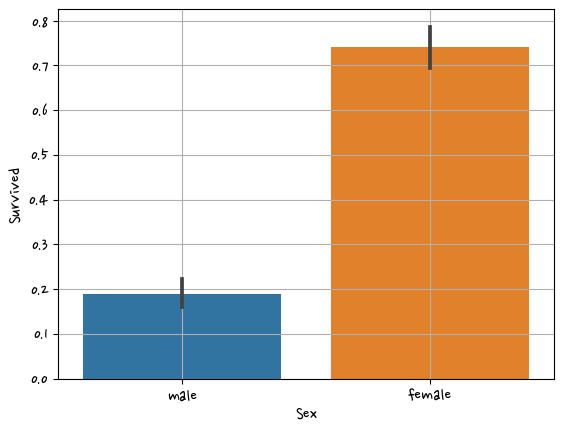

In [14]:
sns.barplot(data=df, x='Sex', y='Survived')
plt.grid(True)

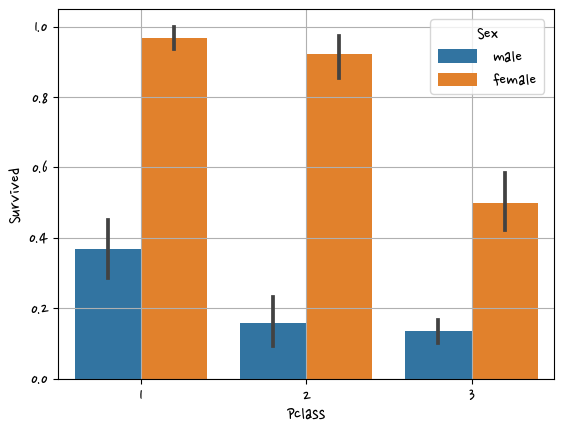

In [15]:
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.grid(True)

In [16]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [17]:
def get_category(age):
    cat = ''
    if age <= -1 : cat='Unkonwn'
    elif age <= 5 : cat='Baby'
    elif age <= 12 : cat='Child'
    elif age <= 18 : cat='Teenager'
    elif age <= 25 : cat='Student'
    elif age <= 35 : cat='Young Adult'
    elif age <= 60 : cat='Adult'
    else: cat='Elderly'
    return cat
    

In [18]:
df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))

# Age 값이 lambda x 에 들어가고 x 값이 get_category에 들어가서 get_category 함수가 실행

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

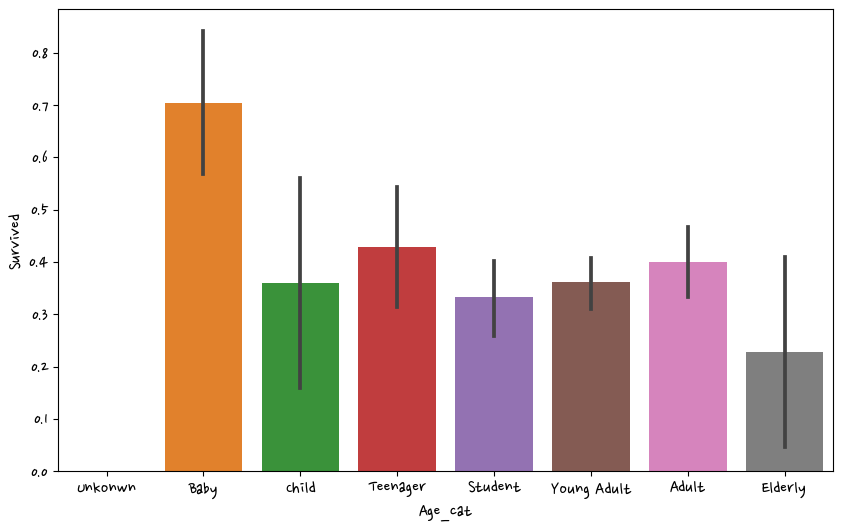

In [19]:
plt.figure(figsize=(10,6))

group_name = ['Unkonwn', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

sns.barplot(data=df, x=df['Age_cat'], y=df['Survived'], order=group_name) # group_name 순서로 정렬
# sns.barplot(data=df, x=df['Age_cat'], y=df['Survived'])

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

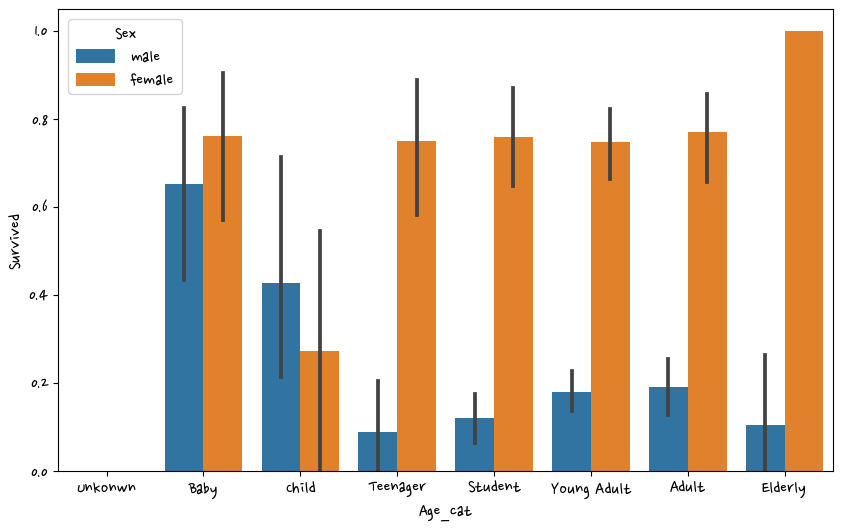

In [20]:
plt.figure(figsize=(10,6))

sns.barplot(data=df, x=df['Age_cat'], y=df['Survived'], order=group_name, hue = 'Sex') # group_name 순서로 정렬


In [21]:

from sklearn.preprocessing import LabelEncoder

In [22]:
def encode_features(df):
    features = ['Sex', 'Cabin', 'Embarked']# 레이블 인코딩 하려는 거 적ㄱ기
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

In [23]:
df = encode_features(df)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [25]:
# 타이타닉 데이터 또 갖다 쓸 때를 댇비해서 함수 만들어놓기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True) 
    df['Cabin'].fillna('N', inplace=True) 
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

In [26]:
def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df


def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']# 레이블 인코딩 하려는 거 적ㄱ기
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

In [27]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [28]:
df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [31]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 생존이냐 사망이냐 하는 거니까 이진분류

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # solver='liblinear' 이거 머여??


In [41]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)

0.7877094972067039

In [42]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.8547486033519553

In [43]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8659217877094972

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param = {
    'max_depth' : [2,3,5,10], 
    'min_samples_split' : [2,3,5],
    'min_samples_leaf' : [1,5,8]
}


# 'min_samples_leaf 리프노드가 되기위한 최소 샘플의 수
# 마지막 동그라미에 최소 몇개의 데이터가 들어가잇어야 하냐 그건가?

In [46]:
grid = GridSearchCV(dt_clf, param_grid=param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [47]:
pred = grid.predict(X_test)

In [48]:
accuracy_score(y_test, pred)

0.8715083798882681

In [49]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [51]:
# grid.cv_results_
df = pd.DataFrame(grid.cv_results_)

In [52]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002705,0.000401,0.001210,3.892509e-04,2,1,2,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
1,0.003570,0.000637,0.002200,7.657923e-04,2,1,3,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
2,0.001810,0.000367,0.000989,3.707347e-05,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
3,0.003195,0.001158,0.002199,7.341031e-04,2,5,2,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
4,0.003002,0.000623,0.001569,4.862625e-04,2,5,3,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
5,0.003042,0.000953,0.001297,6.008594e-04,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
6,0.003380,0.001378,0.002419,5.175344e-04,2,8,2,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
7,0.002547,0.000480,0.001791,4.211344e-04,2,8,3,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
8,0.001989,0.000043,0.001164,4.637348e-04,2,8,5,"{'max_depth': 2, 'min_samples_leaf': 8, 'min_s...",0.734266,0.769231,0.753521,0.788732,0.746479,0.758446,0.018898,28
9,0.002596,0.000761,0.001407,5.190718e-04,3,1,2,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.790210,0.797203,0.830986,0.802817,0.774648,0.799173,0.018499,4


## 3.평가

### 3.1 정확도
데이터 레이블의 불균형이 심한 경우 정확도가 떨어질 수 있다


In [8]:
from sklearn.base import BaseEstimator
# 에스티메이터가 가져야할 기본적인 게 들어있는 거

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

In [5]:
# 학습은 안 하는데(빈 함수) 예측만 하는(여자면 생존 남자는 사망) 모델
class MyDummyClassifier(BaseEstimator): # 파이썬 클래스 이름은 자바에서 이름 붙일때처럼 단어의 첫글자는 대문자로..
    def fit (self, X, y=None): # ??? self는 자기 주소값을 받는댜. 뭔소리지.. 만들떄만 필요하고 함수 사용할 때는 뭐 넣어주는 거 아님
        pass # 건너뛰겠따? 뭘요?????????? 아 줄맞춤 해주느라고 써준거?
    
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred
                

In [6]:
# 타이타닉 데이터 또 갖다 쓸 때를 댇비해서 함수 만들어놓기
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True) 
    df['Cabin'].fillna('N', inplace=True) 
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
    return df


def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']# 레이블 인코딩 하려는 거 적ㄱ기
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

df = pd.read_csv('titanic.csv')
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


???????????? 뭐한거져ㅛ

In [9]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)
pred = myclf.predict(X_test)
accuracy_score(y_test, pred)

0.8324022346368715

데이터가 답이 한쪽으로 치우쳐진 경우
학습도 안 시켰는데 예측치가 83프로나 나옴!
이건 정확도만 가지고 평가할 수 있는 게 아니다


### 3.2 오차 행렬
맞추면 츄르 못맞추면 false
예측클래스를 예측을 0이라고 해서 맞췄으면 네거티브, 1이라고 해서 맞췄으면 포지티브
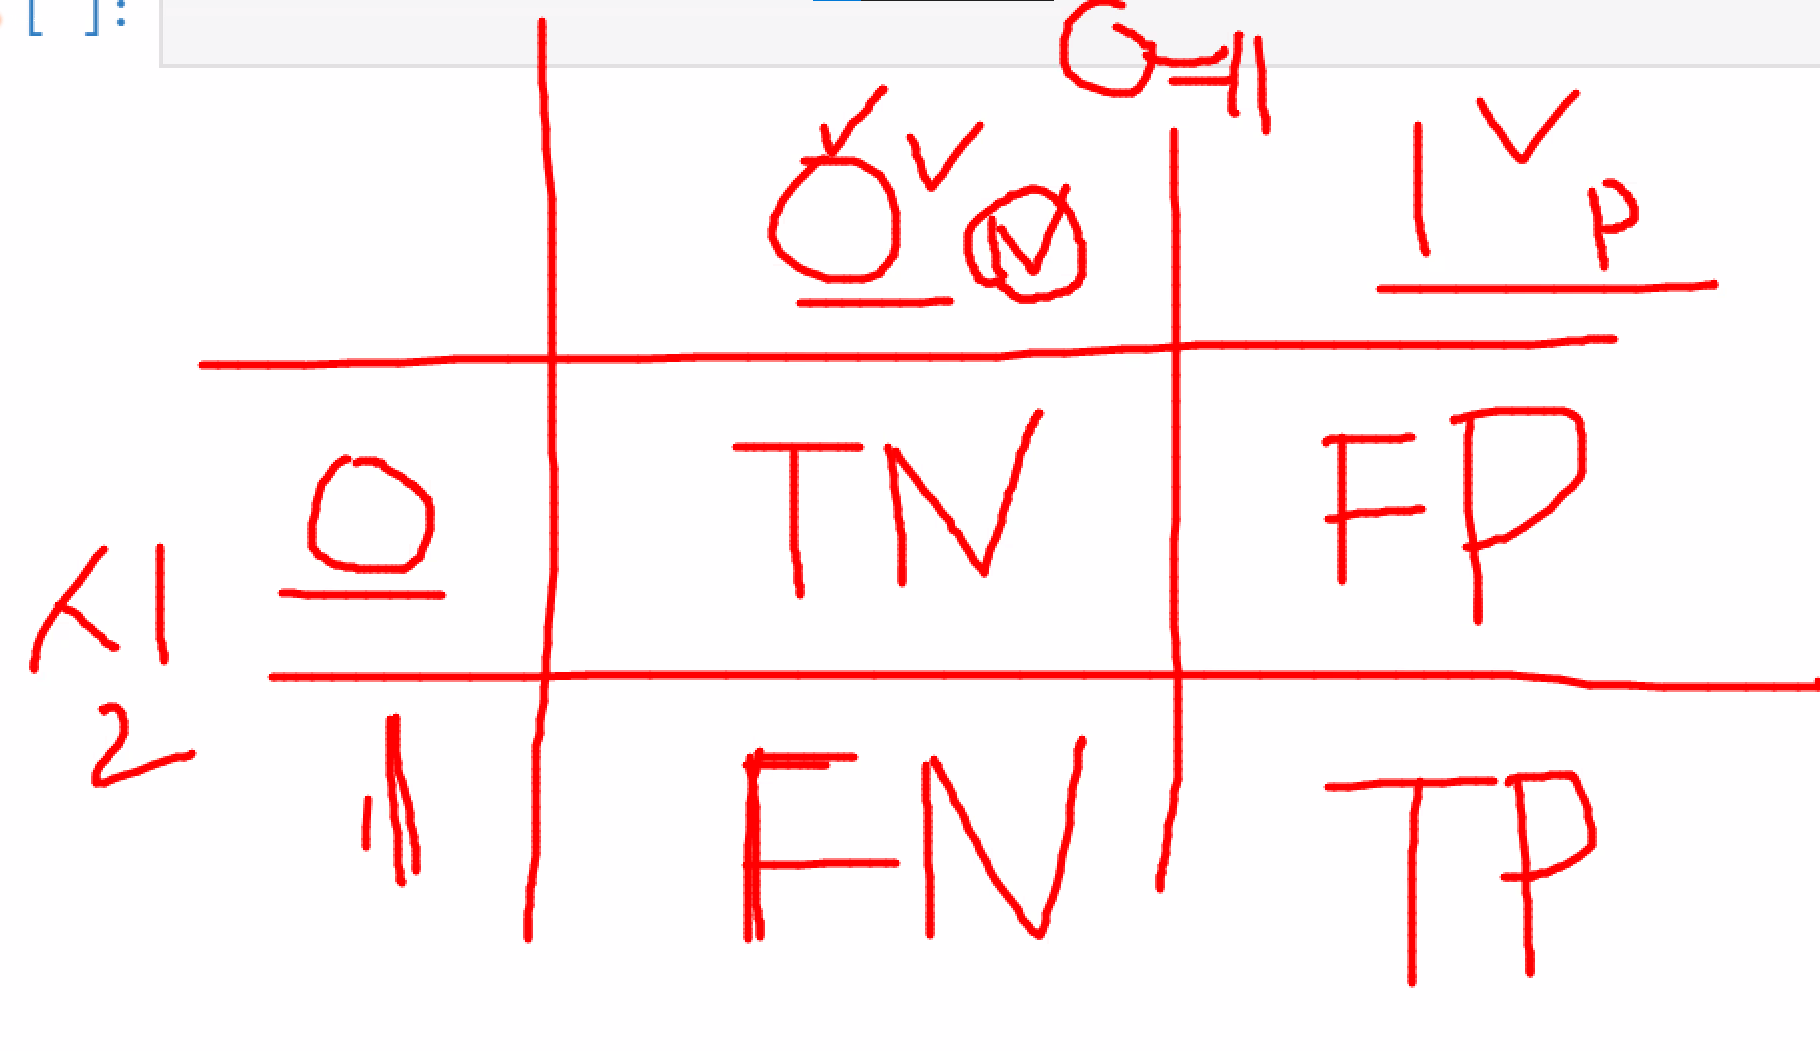

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
confusion_matrix(y_test, pred)

#TN, FP, FN, TP 값이 얼마나 나오냐.. 를 보고 평가한다

array([[103,  15],
       [ 15,  46]], dtype=int64)

### 3.3 정밀도와 재현율
정확도: 맞춘 건수/ 전체건수  
정밀도: 1이라고 예측한 값에서 몇건이나 맞았나. 예측값 1 기준. 예측한 것 중에 얼마나 맞췄나  
재현율: 실제건(실제건맞춤+실제건못맞춤) 중에 실제 맞춘 거. 실제건 1 기준. 실제값중에 얼마나 맞추었냐 

정밀도와 재현율은 반비례한다. 한쪽으로 치우치지 않게 해야.. 경우에따라 정밀도가 중요할 수도 있고, 재현율이 중요할 수도 있다.